In [261]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.5.0


# Creating data to view and fit

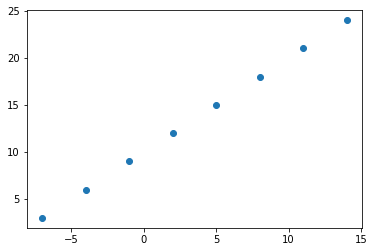

In [262]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
# Create labels
y = np.array([3. ,6. ,9. ,12. ,15. ,18.0 ,21. ,24.])

# Visualize it
plt.scatter(X, y)


In [263]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and output shapes

In [264]:
# Create a demo tensor for housing price prediction
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_info

<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>

In [265]:
input_shape = X.shape
output_shape = y.shape


In [266]:
# Turn NumPy arrays into tensors
X = tf.constant(X)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [267]:
input_shape = X[0].shape
output_shape = y[0].shape


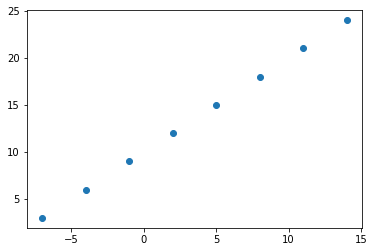

In [268]:
plt.scatter(X, y)

# Steps in modelling with TensorFlow
1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (the function which tells our model how wrong it is) and the optimizer (tells model how to improve the patterns to its learning) and evaluation metrics (what is used to interpret the performance of a model)
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels)

In [269]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae = mean absolute error
optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # SGD = Stochastic Gradient Descent
metrics=['mae']
)

# 3. Fit the model
history = model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 335ms/step - loss: 12.3185 - mae: 12.3185
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.4382 - mae: 11.4382
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5493 - mae: 10.5493
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 9.7151 - mae: 9.7151
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 9.0089 - mae: 9.0089
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 8.2745 - mae: 8.2745
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 7.5150 - mae: 7.5150
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 6.7230 - mae: 6.7230
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 5.8979 - mae: 5.8979
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 5.0335 - mae: 5.0335
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss:

In [270]:
y_pred = model.predict([18.0])
y_pred

array([[28.09094]], dtype=float32)

## Improving the model

1. **Creating a model** - might add more layers, increase the number of hiddent units (all called neurons), change the activation function of each layer.
2. **Compiling a model** - might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - might fit a model for more **epochs** (leave it training for longer) on or more data (give the model more examples to learn from)

# Evaluating a model

## **Visualize, visualize, visualize**

In [271]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)


In [272]:
# Make labels for the dataset
y= X + 10


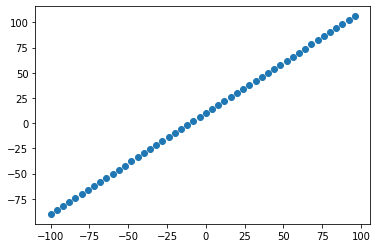

In [273]:
# Visualize the data
plt.scatter(X, y)
plt.show()

## The 3 sets:
* **Training set** - the model learns from this data
* **Validation set** - the model gets tuned on this data (10%-15% of the data available)
* **Test set** - the model gets evaluated on this data to test what it has learned (10%-15% of the total data available)


In [274]:
# Split the data into train and test sets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

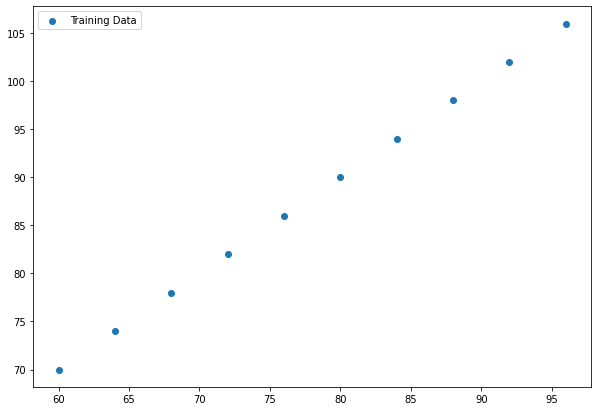

In [275]:
# Visualizing the data
plt.figure(figsize=(10,7))
plt.scatter(X_test, y_test)
plt.legend(['Training Data','Test Data'])

In [276]:
# Build a neural network for the available data

# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1), input_shape=)

# # 2. Compile the model

# model.compile(optimizer=tf.keras.optimizers.SGD(), metrics=['mae'], loss=tf.keras.losses.mae)

# # 3. Fit the model
# # model.fit(X_train, y_train, epochs=100)


# Visualizing the model
model.summary()

In [277]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, input_shape=[1]))
model.add(tf.keras.layers.Dense(1))

model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])

model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


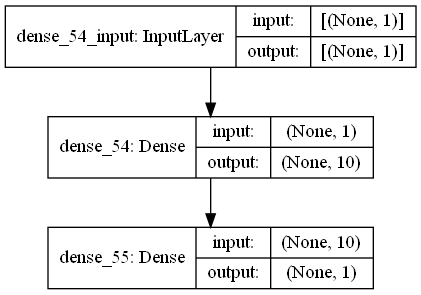

In [278]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes='True')

In [279]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [280]:
model. fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/100
2/2 [==============================] - 0s 4ms/

# Visualizing the model predictions

In [281]:
y_pred = model.predict(y_test)
y_pred

array([[ 82.02151 ],
       [ 86.60922 ],
       [ 91.19695 ],
       [ 95.78468 ],
       [100.372406],
       [104.96012 ],
       [109.54786 ],
       [114.13558 ],
       [118.723305],
       [123.31103 ]], dtype=float32)

In [282]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [283]:
# Create a plotting function
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=y_pred):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, label='Training Data')
    plt.scatter(test_data, test_labels, label='Testing Data')
    plt.scatter(test_data, predictions, label='Predictions')
    plt.legend()

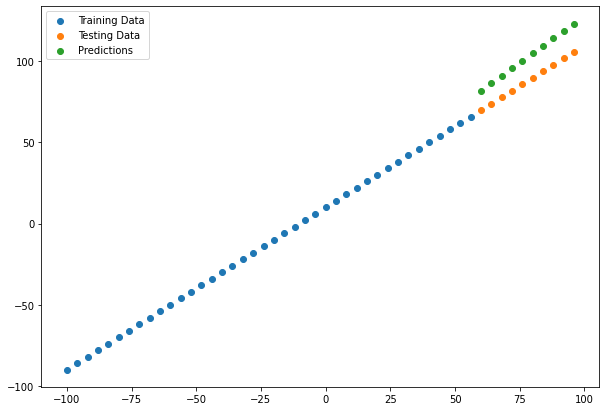

In [284]:
plot_prediction()

## Evaluating model predictions with regression evaluation metrics
* MAE - Mean Absolute Error, on average, how wrong is each of the model's predictions
* MSE - Mean Square Error, square the average errors

In [285]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 101ms/step - loss: 3.1970 - mae: 3.1970


[3.196955919265747, 3.196955919265747]

In [286]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 82.02151 ,  86.60922 ,  91.19695 ,  95.78468 , 100.372406,
       104.96012 , 109.54786 , 114.13558 , 118.723305, 123.31103 ],
      dtype=float32)>

In [287]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=14.6662655>

In [288]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=217.9491>

In [289]:
# Make function to reuse MAE and MSE
def mae(y_true,y_pred):
    return tf.metrics.mean_absolute_error(y_true, tf.squeeze(y_pred))

def mse(y_true,y_pred):
    return tf.metrics.mean_squared_error(y_true, tf.squeeze(y_pred))


## Running experiments to impove the model

In [290]:
tf.random.set_seed(42)

model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(1))


model.compile(
    loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), metrics=["mae"]
)

model.fit(X_train, y_train, epochs=100)


Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 34.3231 - mae: 34.3231
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 40.9378 - mae: 40.9378
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 40.3816 - mae: 40.3816
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 39.4056 - mae: 39.4056
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 36.3837 - mae: 36.3837
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 23.4526 - mae: 23.4526
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 22.9751 - mae: 22.9751
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 21.3616 - mae: 21.3616
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 125.9845 - mae: 125.9845
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 40.9056 - mae: 40.9056
Epoch 11/100
2/2 [==============================] - 0s 5m

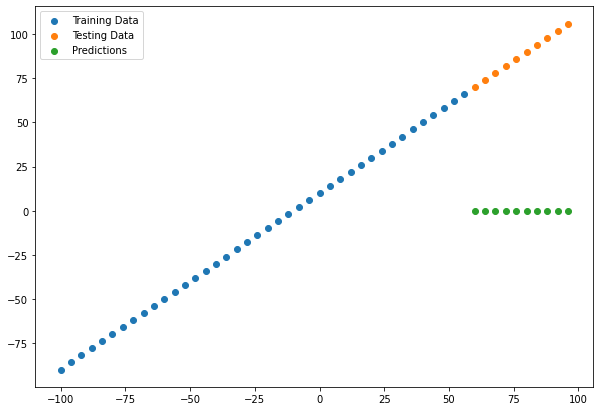

In [291]:
y_preds_1 = model.predict(X_test)
plot_prediction(predictions=y_preds_1)

In [292]:
import pandas as pd

model_results = ['model']

# Saving the models
1. The SavedModel format
2. The HDF5 format

In [293]:
model.save('model.h5')

# A larger example

In [294]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [295]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [296]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [297]:
X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']

In [298]:
X, y

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0      19  27.900         0           1         0          0           1   
 1      18  33.770         1           0         1          1           0   
 2      28  33.000         3           0         1          1           0   
 3      33  22.705         0           0         1          1           0   
 4      32  28.880         0           0         1          1           0   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1333   50  30.970         3           0         1          1           0   
 1334   18  31.920         0           1         0          1           0   
 1335   18  36.850         0           1         0          1           0   
 1336   21  25.800         0           1         0          1           0   
 1337   61  29.070         0           1         0          0           1   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [299]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [300]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(1))

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"],
)

history = model.fit(X_train, y_train, epochs=100)


Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 11434.4619 - mae: 11434.4619
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7504.8208 - mae: 7504.8208
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 7289.5034 - mae: 7289.5034
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 7064.4629 - mae: 7064.4629
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 6825.5923 - mae: 6825.5923
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 6569.6011 - mae: 6569.6011
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 6442.8633 - mae: 6442.8633
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 6254.7827 - mae: 6254.7827
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 6121.6006 - mae: 6121.6006
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 5940.2461 - mae: 5940.24

In [301]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3159.0825 - mae: 3159.0825


[3159.08251953125, 3159.08251953125]

Text(0.5, 0, 'epochs')

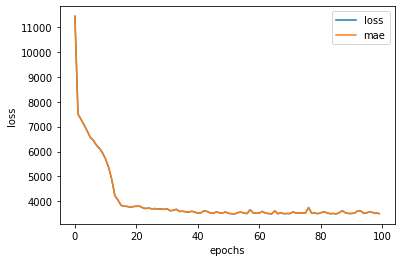

In [302]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

# Normalization

In [310]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [311]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi','children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

X = insurance.drop('charges', axis=1)
y = insurance['charges']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [312]:
X_train_normal.shape

(1070, 11)

In [314]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential()
insurance_model.add(tf.keras.layers.Dense(100))
insurance_model.add(tf.keras.layers.Dense(10))
insurance_model.add(tf.keras.layers.Dense(1))

insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"],
)

insurance_model.fit(X_train_normal, y_train, epochs=100)


Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 13217.9922 - mae: 13217.9922
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 11378.7979 - mae: 11378.7979
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 8112.9438 - mae: 8112.9438
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 7588.9111 - mae: 7588.9111
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 7103.4795 - mae: 7103.4795
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 6513.8726 - mae: 6513.8726
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 5593.9995 - mae: 5593.9995
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 4434.3428 - mae: 4434.3428
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 3745.8264 - mae: 3745.8264
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 3679.4285 - mae: 3679.